<a href="https://colab.research.google.com/github/micah-shull/LLMs/blob/main/LLM_034_fine_tuning_yahoo_answers_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yahoo Answers Topics Dataset Summary

The **Yahoo Answers Topics** dataset is a large-scale text classification dataset sourced from the Yahoo Answers community question-answering platform. It includes a diverse range of topics, making it a valuable resource for training and evaluating models on multiclass text classification tasks. The dataset is structured to classify user-submitted questions and answers into one of ten distinct topic categories.

#### Dataset Structure

- **Number of Classes**: 10
- **Classes**:
  1. Society & Culture
  2. Science & Mathematics
  3. Health
  4. Education & Reference
  5. Computers & Internet
  6. Sports
  7. Business & Finance
  8. Entertainment & Music
  9. Family & Relationships
  10. Politics & Government

- **Columns**:
  - **id**: Unique identifier for each entry.
  - **topic**: The target label, represented as an integer from 0 to 9, corresponding to one of the 10 topics above.
  - **question_title**: The title of the user’s question.
  - **question_content**: The full content of the question.
  - **best_answer**: The best answer selected for the question, if available.

- **Data Splits**:
  - **Training Set**: 1,400,000 samples
  - **Test Set**: 60,000 samples

#### Use Case

This dataset is ideal for exploring multiclass classification, particularly for tasks requiring a model to distinguish between broad thematic categories based on limited context. It is commonly used in research and applications involving topic classification, question answering, and content categorization.

#### Example Usage

The Yahoo Answers Topics dataset can be used to train models that automatically classify questions into general topics, which is helpful for content filtering, recommendation systems, and automated helpdesk systems.



#### Question Title & Content

In the Yahoo Answers Topics dataset, the **question title** and **question content** serve different roles in framing the user's question. Here’s how they generally differ:

1. **Question Title**:
   - The question title is typically a **short summary or headline** that gives a quick overview of what the question is about.
   - It’s often brief and concise, capturing the main topic or intent in just a few words.
   - For example: "How do I make pasta?"

2. **Question Content**:
   - The question content is the **full description** or **additional details** provided by the user to clarify or elaborate on the question.
   - This section usually includes more context, specifics, or sub-questions that expand on the title.
   - For example, in addition to the title "How do I make pasta?", the content might be: "I want to try making pasta from scratch. What ingredients do I need, and what is the basic process?"

#### Example of Question Title vs. Content

- **Question Title**: "How do I make pasta?"
- **Question Content**: "I’m planning to make pasta for dinner but have never done it before. Do I need a special machine, or can I do it by hand? What type of flour should I use?"


#### Importance in Modeling

Using both the title and content together can give a more comprehensive representation of the question, which can be particularly useful for classification tasks, as it provides both a summary and detailed context that help capture the nuances of the question topic.

### Combine Title & Content

In the code we’re **combining the title and content into a single string** for each entry. This approach provides the model with both the concise summary (title) and the detailed context (content), creating a more informative input for training.

```python
train_documents_sample = [
    f"{dataset['train']['question_title'][i]} {dataset['train']['question_content'][i]}"
    for i in train_sample_indices
]
```

In this case, each entry in `train_documents_sample` will contain both the question title and the content in a single string, separated by a space. This approach helps ensure that the model has access to the full context of the question during training, improving its ability to accurately classify the topics.

Combining the title and content is a common technique for text classification when both parts provide valuable information, as it creates a richer representation of the input.

#### Load & Import Libraries

In [6]:
# !pip install transformers datasets
# !pip install python-dotenv

In [1]:
# Hugging Face Libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset, Dataset
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Standard Libraries
import pandas as pd
import numpy as np
import os
import time
import json
from dotenv import load_dotenv

# Metrics and Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load  Data
Absolutely, it's entirely possible to work with a smaller sample of the Yahoo Answers dataset to avoid issues like running out of memory in your Colab notebook. You can sample a portion of the dataset after loading it using the `load_dataset` function. Below, I'll show you how you can load a subset of the dataset to continue with the fine-tuning process.

### Step-by-Step Approach to Sampling the Dataset:

1. **Load the Dataset**: Load the entire dataset using `load_dataset()`.
2. **Sampling**: Use the `.train_test_split()` method or pandas to create a sample of the dataset.
3. **Proceed with the Sample**: Use the smaller sample for training to avoid memory issues.

### Explanation:

1. **Loading the Dataset**:
   ```python
   dataset = load_dataset("yahoo_answers_topics")
   ```
   This line loads the Yahoo Answers dataset, which is large by default.

2. **Sampling the Dataset**:
   ```python
   sampled_dataset = dataset["train"].train_test_split(test_size=0.9)["test"]
   ```
   Here, we use the `.train_test_split()` method to create a smaller subset of the training data. By setting `test_size=0.9`, you are effectively keeping only 10% of the original data (`test`) and discarding 90% (`train`). You can adjust this ratio depending on the available resources.

3. **Using the Sampled Dataset**:
   You can proceed with `sampled_dataset` for training and other processing steps. The sampled dataset will be much smaller and more manageable in Colab.

### Alternative Approach: Using `select` for Specific Number of Samples

If you want a specific number of samples instead of a percentage, you can use the `select` method:

```python
# Select a specific number of samples, e.g., 1000
sampled_dataset = dataset["train"].select(range(1000))
```
This line selects the first 1000 samples from the training set.

### Notes:

- The `.train_test_split()` and `.select()` methods allow you to create a subset of the dataset, making it easier to handle memory constraints.
- It is generally advisable to work with a smaller portion of the data for prototyping or when you have limited computational resources.

With this smaller dataset, you can proceed with preprocessing and fine-tuning the language model using the Hugging Face Transformers library without overwhelming Colab's memory.

The `train_test_split()` method used in the code is from **Hugging Face's `datasets` library**, not from `sklearn`.

### Difference Between the Two:

- **Hugging Face's `datasets` Library (`train_test_split()`)**:
  - This method is specifically designed to work with datasets in the Hugging Face format.
  - It operates directly on `Dataset` objects, allowing you to split the dataset without converting it to another format.
  - You can specify the split ratio (e.g., `test_size=0.9`), and it returns new `Dataset` objects that can be used for training and testing.

- **`sklearn`'s `train_test_split()` Function**:
  - This function is from the `scikit-learn` library and is typically used with pandas dataframes or numpy arrays.
  - It splits data into training and testing sets but requires the data to be in array or dataframe form before splitting.

For Hugging Face datasets, it is more efficient to use their built-in `train_test_split()` method, as it works directly with their dataset objects and avoids the need for conversion to a different data structure.



In [3]:
# Load environment variables
load_dotenv('/content/API_KEYS.env')
hugginface_api_key = os.getenv("HUGGINGFACE_API_KEY")
# Set the environment variable globally for libraries like LangChain
# os.environ["HUGGINGFACEHUB_API_TOKEN"] = hugginface_api_key
os.environ["HF_TOKEN"] = hugginface_api_key
print("HUGGINFACE API Key loaded from .env:",os.environ["HF_TOKEN"][0:10])

# Load the Yahoo Answers dataset
dataset = load_dataset("yahoo_answers_topics")

# Define the label names
label_names = [
    "Society & Culture", "Science & Mathematics", "Health", "Education & Reference",
    "Computers & Internet", "Sports", "Business & Finance", "Entertainment & Music",
    "Family & Relationships", "Politics & Government"
]

# Print the original dataset sizes
print("Original dataset sizes:")
print("Train:", len(dataset["train"]))
print("Test:", len(dataset["test"]))

# Sample 10% of the original train and test datasets
train_sample = dataset["train"].train_test_split(test_size=0.1)["test"]  # Keep 10% of the training set
test_sample = dataset["test"].train_test_split(test_size=0.1)["test"]    # Keep 10% of the test set

# Print the sampled dataset sizes
print("\nSampled dataset sizes (10% of original sets):")
print("Sampled Train:", len(train_sample))
print("Sampled Test:", len(test_sample))


# Display the first few entries in the sampled dataset
for i in range(3):
    print(f"\nSample {i+1}:")
    print("Question Title:", train_sample["question_title"][i])
    print("Question Content:", train_sample["question_content"][i])
    print("Best Answer:", train_sample["best_answer"][i])
    print("Label:", label_names[train_sample["topic"][i]])
    print("=" * 50)

# Print the first entries of train and test datasets to inspect their structure
print("\nTrain Sample:")
print(json.dumps(train_sample[0], indent=2))

print("\nTest Sample:")
print(json.dumps(test_sample[0], indent=2))

HUGGINFACE API Key loaded from .env: hf_qMYzmzn
Original dataset sizes:
Train: 1400000
Test: 60000

Sampled dataset sizes (10% of original sets):
Sampled Train: 140000
Sampled Test: 6000

Sample 1:
Question Title: What are the critical scarce resources?
Question Content: 
Best Answer: intelligent people without their head up their ^$$
Label: Education & Reference

Sample 2:
Question Title: What is your favorite color hair and eyes on the opposite sex?
Question Content: 
Best Answer: I have always loved brown eyes....\nsorry!  I will take some Auburn hair please!
Label: Entertainment & Music

Sample 3:
Question Title: I live in Panama City Florida so when does school end????
Question Content: 
Best Answer: hi i live in valprasio fl and school over here school ends may 18
Label: Education & Reference

Train Sample:
{
  "id": 781902,
  "topic": 3,
  "question_title": "What are the critical scarce resources?",
  "question_content": "",
  "best_answer": "intelligent people without their hea

#### Class Distribution Before Sampling

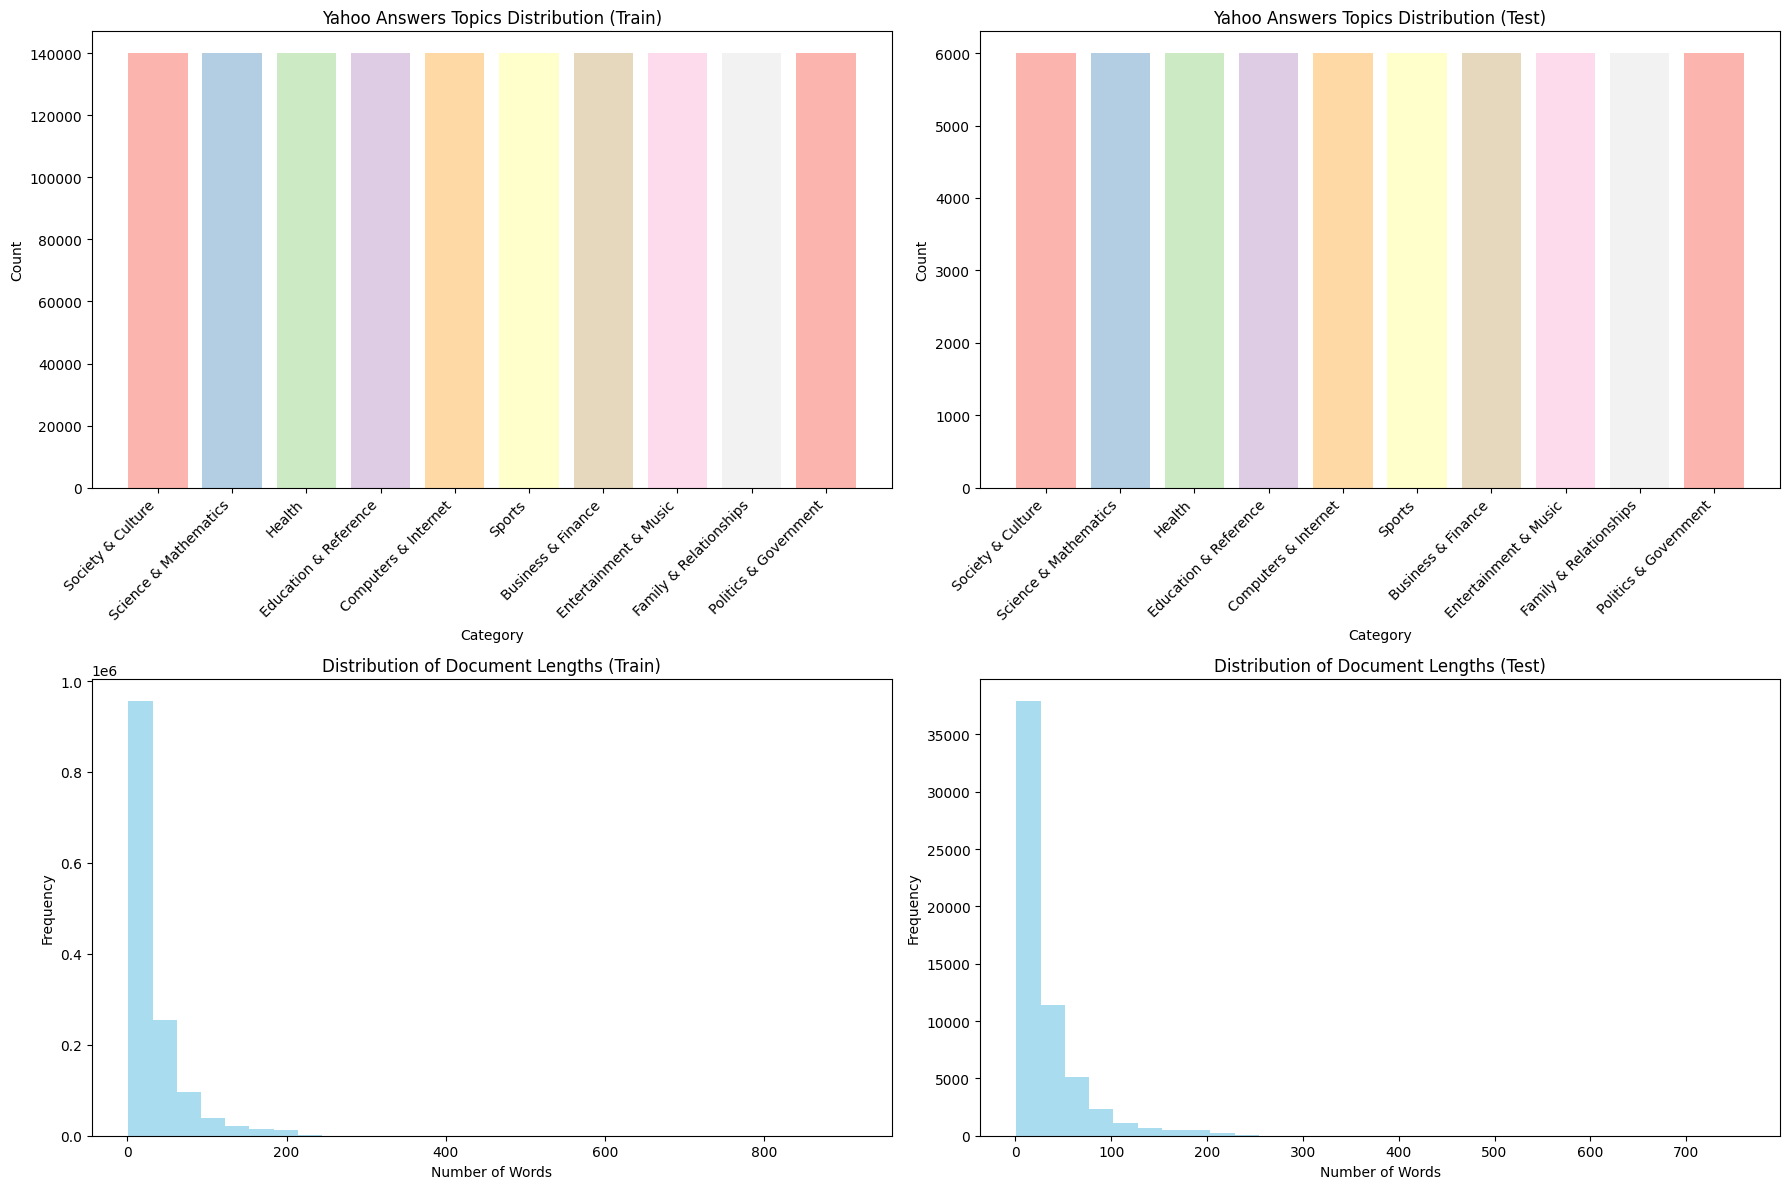

In [9]:
# Calculate value counts for labels for train and test datasets
train_label_counts = pd.Series(dataset['train']['topic']).value_counts().sort_index()
test_label_counts = pd.Series(dataset['test']['topic']).value_counts().sort_index()
train_label_counts.index = label_names  # Map numeric labels to topic names
test_label_counts.index = label_names   # Map numeric labels to topic names

# Combine 'question_title' and 'question_content' for document lengths for train and test datasets
train_documents = [f"{title} {content}" for title, content in zip(dataset['train']['question_title'], dataset['train']['question_content'])]
test_documents = [f"{title} {content}" for title, content in zip(dataset['test']['question_title'], dataset['test']['question_content'])]
train_document_lengths = [len(doc.split()) for doc in train_documents]  # Calculate document lengths for train
test_document_lengths = [len(doc.split()) for doc in test_documents]    # Calculate document lengths for test

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Set up a color palette
palette = sns.color_palette("Pastel1", 10)

# Plot 1: Train Label Distribution
axes[0, 0].bar(train_label_counts.index, train_label_counts.values, color=palette)
axes[0, 0].set_title("Yahoo Answers Topics Distribution (Train)")
axes[0, 0].set_xlabel("Category")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_xticks(range(len(train_label_counts.index)))
axes[0, 0].set_xticklabels(train_label_counts.index, rotation=45, ha='right')

# Plot 2: Test Label Distribution
axes[0, 1].bar(test_label_counts.index, test_label_counts.values, color=palette)
axes[0, 1].set_title("Yahoo Answers Topics Distribution (Test)")
axes[0, 1].set_xlabel("Category")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticks(range(len(test_label_counts.index)))
axes[0, 1].set_xticklabels(test_label_counts.index, rotation=45, ha='right')

# Plot 3: Train Document Length Distribution
axes[1, 0].hist(train_document_lengths, bins=30, color='skyblue', alpha=0.7)
axes[1, 0].set_title("Distribution of Document Lengths (Train)")
axes[1, 0].set_xlabel("Number of Words")
axes[1, 0].set_ylabel("Frequency")

# Plot 4: Test Document Length Distribution
axes[1, 1].hist(test_document_lengths, bins=30, color='skyblue', alpha=0.7)
axes[1, 1].set_title("Distribution of Document Lengths (Test)")
axes[1, 1].set_xlabel("Number of Words")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display basic statistics for train and test document lengths
print("Train Document Length Statistics:")
print("Mean Length:", sum(train_document_lengths) / len(train_document_lengths))
print("Max Length:", max(train_document_lengths))
print("Min Length:", min(train_document_lengths))
print("\nTest Document Length Statistics:")
print("Mean Length:", sum(test_document_lengths) / len(test_document_lengths))
print("Max Length:", max(test_document_lengths))
print("Min Length:", min(test_document_lengths))


### Sample Data

In [10]:
# Sample 10% of the original train and test datasets
train_sample = dataset["train"].train_test_split(test_size=0.1)["test"]  # Keep 10% of the training set
test_sample = dataset["test"].train_test_split(test_size=0.1)["test"]    # Keep 10% of the test set

# Define a function to format the data into roles for fine-tuning
def format_for_fine_tuning(dataset_sample):
    formatted_data = []

    for i in range(len(dataset_sample)):
        question = f"{dataset_sample[i]['question_title']} {dataset_sample[i]['question_content']}".strip()
        answer = dataset_sample[i]['best_answer']

        formatted_data.append([
            {"role": "system", "content": "You are an assistant who helps answer questions from Yahoo Answers users."},
            {"role": "user", "content": question},
            {"role": "assistant", "content": answer}
        ])

    return formatted_data

# Format train and test datasets separately
formatted_train_data = format_for_fine_tuning(train_sample)
formatted_test_data = format_for_fine_tuning(test_sample)

# Print a sample formatted entry from train and test data to inspect the structure
print("Train Sample Entry:")
print(json.dumps(formatted_train_data[0], indent=2))

print("\nTest Sample Entry:")
print(json.dumps(formatted_test_data[0], indent=2))

# Save the formatted data to JSONL files
def save_to_jsonl(data, filename):
    with open(filename, 'w') as f:
        for entry in data:
            f.write(json.dumps(entry) + '\n')

# Save train and test data separately
save_to_jsonl(formatted_train_data, "formatted_yahoo_answers_train.jsonl")
save_to_jsonl(formatted_test_data, "formatted_yahoo_answers_test.jsonl")


Train Document Length Statistics:
Mean Length: 32.395272142857145
Max Length: 915
Min Length: 1

Test Document Length Statistics:
Mean Length: 32.36026666666667
Max Length: 760
Min Length: 1
Train Sample Entry:
[
  {
    "role": "system",
    "content": "You are an assistant who helps answer questions from Yahoo Answers users."
  },
  {
    "role": "user",
    "content": "Who are the known manufacturers of flame retardants for textile applications? These are chemicals used by textile manufacturers to make fabrics and home textiles flame resistant."
  },
  {
    "role": "assistant",
    "content": "http://www.aatcc.org/bg/"
  }
]

Test Sample Entry:
[
  {
    "role": "system",
    "content": "You are an assistant who helps answer questions from Yahoo Answers users."
  },
  {
    "role": "user",
    "content": "Do you know some OCR programs for linux (mandriva or Suse)? i read somewhere, that abby fine reader 6 have linux version, but it is just the engine. i have to recognize hungarian 

The **output format** we're dealing with is essentially a **list of dictionaries**, where each dictionary contains key-value pairs that define the **role** (e.g., system, user, assistant) and the **content** for that role. Let's break down what this means and how it relates to fine-tuning a **Large Language Model (LLM)**.

#### JSONL: List of Dictionaries

1. **List of Dictionaries**:
   - In the Python code, each conversation is represented as a **list of dictionaries**.
   - Each dictionary contains the following keys:
     - **"role"**: This indicates the role in the conversation, such as `"system"`, `"user"`, or `"assistant"`.
     - **"content"**: This contains the actual text for that role (e.g., the instructions from the system, the question from the user, or the response from the assistant).
   
   In this example, the list contains **three dictionaries**:
   - The first dictionary is the **system message** that gives the assistant context about its role.
   - The second dictionary is the **user's question**.
   - The third dictionary is the **assistant's response**.

### JSON vs. JSONL

- **JSON (JavaScript Object Notation)**:
  - A **JSON** file is typically used for structured data storage where you might have a single, cohesive object or an array of objects. JSON files are often used when you want to load all the data at once.
  - The format of the list of dictionaries can easily be saved to a JSON file, but the entire structure would be loaded into memory at once, which may be problematic for larger datasets.

- **JSONL (JSON Lines)**:
  - In a **JSONL** file, each **line** is a complete JSON object (in this case, a conversation in the list of dictionaries).
  - By saving each conversation as a separate line, **JSONL** helps keep memory usage low since you can read and process each line individually rather than loading the entire file at once.
  - For example, if you save each conversation as a line in the JSONL file, you can stream it efficiently:
    ```json
    [{"role": "system", "content": "You are an assistant who helps answer questions from Yahoo Answers users."}, {"role": "user", "content": "How can I get better at math?"}, {"role": "assistant", "content": "To improve in algebra, practice is key..."}]
    [{"role": "system", "content": "You are an assistant who helps answer questions from Yahoo Answers users."}, {"role": "user", "content": "How to cook spaghetti squash?"}, {"role": "assistant", "content": "To cook spaghetti squash, cut it in half..."}]
    ```

### Relation to Fine-Tuning an LLM

To **fine-tune a Large Language Model (LLM)**, you need to provide a dataset that contains examples of conversational pairs or dialogues that the model can learn from. The format we've discussed—**lists of dictionaries** with roles (`"system"`, `"user"`, `"assistant"`)—is ideal for fine-tuning models like those in the **Hugging Face Transformers library** or **OpenAI's GPT models**, which rely on understanding conversation structure.

Here's how it relates to fine-tuning:

1. **Roles in Conversations**:
   - The roles (`"system"`, `"user"`, `"assistant"`) are crucial for instructing the LLM on how to behave in each part of the conversation.
   - The **"system"** message sets the context, telling the model its purpose or role.
   - The **"user"** message simulates what a user might say or ask.
   - The **"assistant"** message provides the response that the model should learn to give.

2. **Training Data Format**:
   - When training the LLM, the dataset is typically provided as sequences of interactions. The roles and content help the model understand what to expect and how to respond.
   - By providing a structured dataset with **context-response pairs**, you help the model learn not just how to answer questions but also the context in which it should give those answers.
  
3. **Efficient Training Using JSONL**:
   - During fine-tuning, instead of loading the entire dataset into memory, the **JSONL** format allows for efficient streaming. The training script can read each conversation from the JSONL file line by line, which is memory efficient and suitable for training large models with limited hardware resources.
   - Many frameworks, such as **Hugging Face's `datasets` library**, allow direct reading from JSONL files, making it simple to use these formatted data for training.



In [11]:
# Print the first five entries of the formatted train data
print("First 5 entries of formatted train data:")
for i in range(5):
    print(formatted_train_data[i])

# Print the first five entries of the formatted test data
print("\nFirst 5 entries of formatted test data:")
for i in range(5):
    print(formatted_test_data[i])


First 5 entries of formatted train data:
[{'role': 'system', 'content': 'You are an assistant who helps answer questions from Yahoo Answers users.'}, {'role': 'user', 'content': 'Who are the known manufacturers of flame retardants for textile applications? These are chemicals used by textile manufacturers to make fabrics and home textiles flame resistant.'}, {'role': 'assistant', 'content': 'http://www.aatcc.org/bg/'}]
[{'role': 'system', 'content': 'You are an assistant who helps answer questions from Yahoo Answers users.'}, {'role': 'user', 'content': "i wish wolf wood didn't have to die on trigun , do you agree?"}, {'role': 'assistant', 'content': "i know , he shoundn't of died"}]
[{'role': 'system', 'content': 'You are an assistant who helps answer questions from Yahoo Answers users.'}, {'role': 'user', 'content': 'who is in my left hand?'}, {'role': 'assistant', 'content': 'Thumbalina? lol'}]
[{'role': 'system', 'content': 'You are an assistant who helps answer questions from Yaho

#### Class Distribution after Sampling

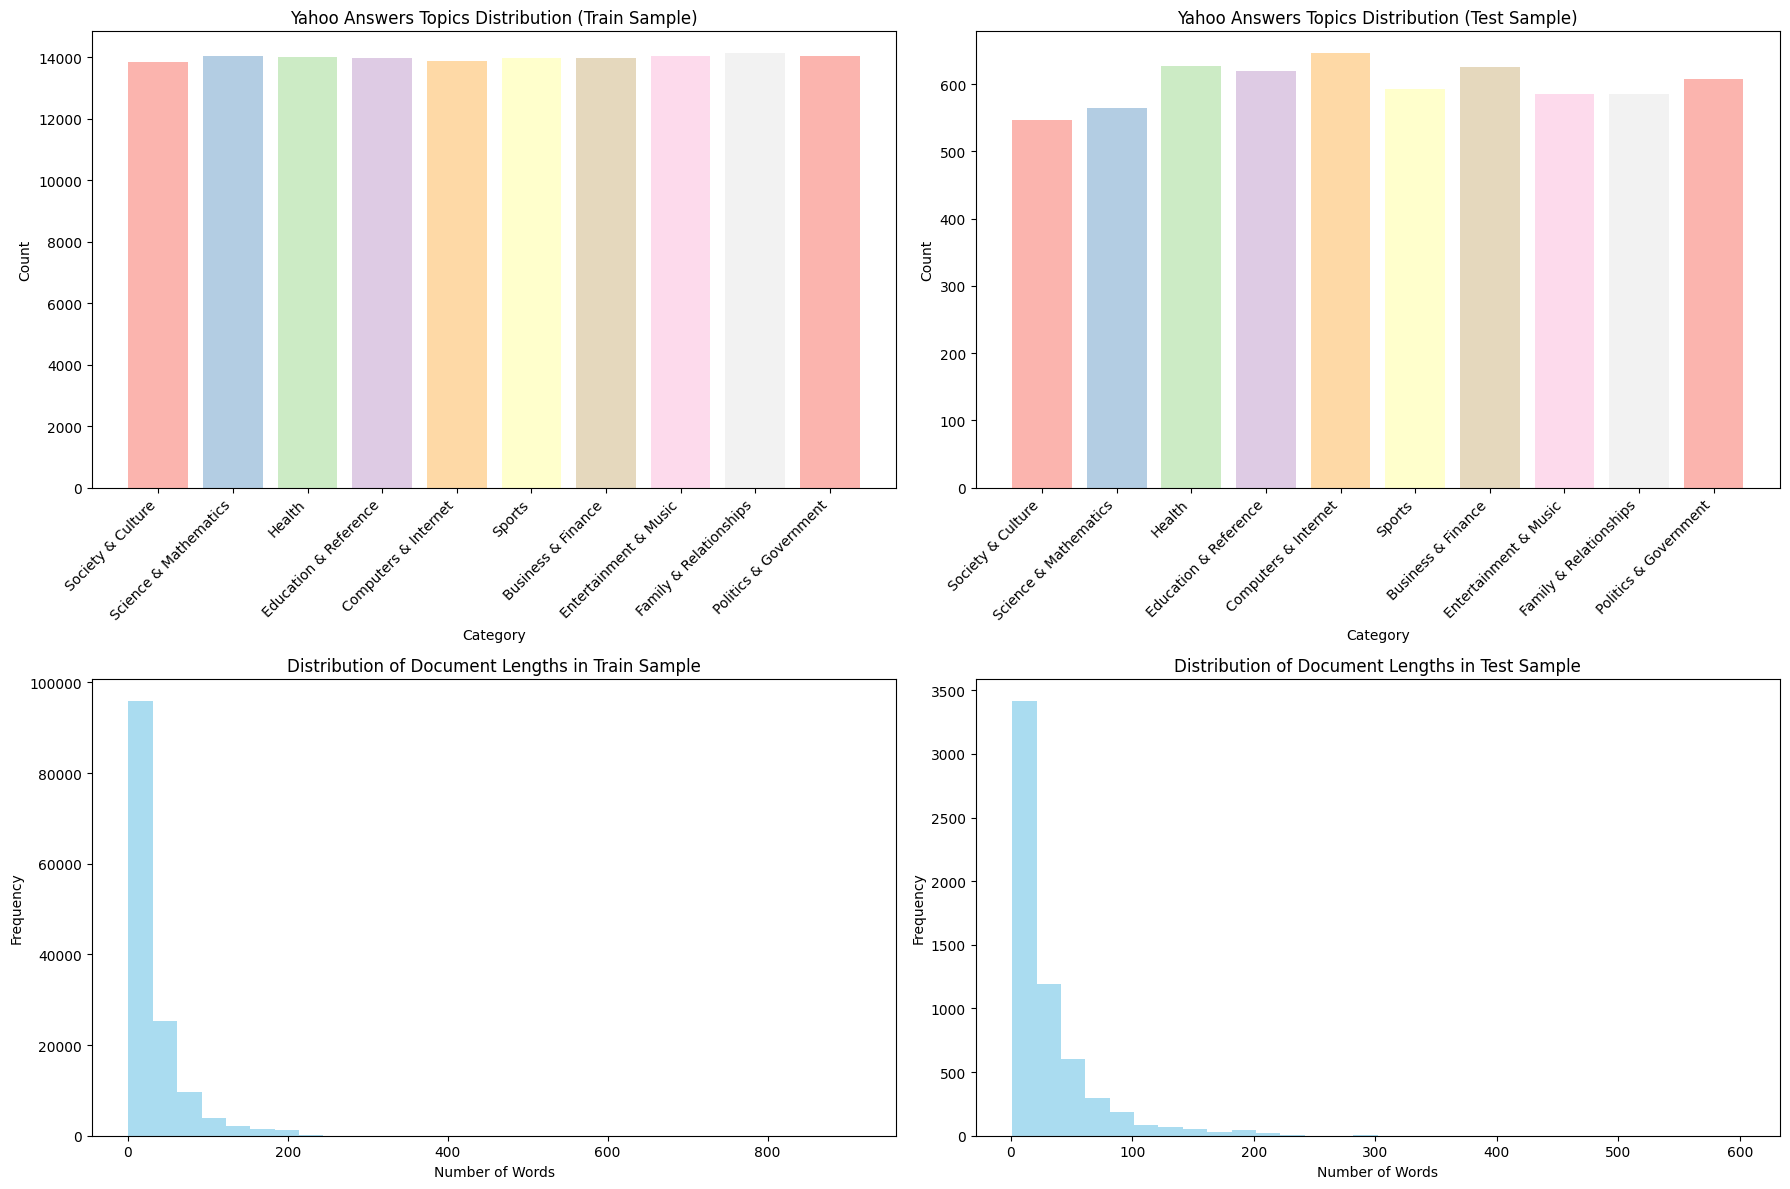

In [12]:
# Calculate value counts for labels in sampled train and test datasets
train_label_counts = pd.Series(train_sample['topic']).value_counts().sort_index()
test_label_counts = pd.Series(test_sample['topic']).value_counts().sort_index()
train_label_counts.index = label_names  # Map numeric labels to topic names
test_label_counts.index = label_names   # Map numeric labels to topic names

# Combine 'question_title' and 'question_content' for document lengths in sampled train and test datasets
train_documents = [f"{title} {content}" for title, content in zip(train_sample['question_title'], train_sample['question_content'])]
test_documents = [f"{title} {content}" for title, content in zip(test_sample['question_title'], test_sample['question_content'])]
train_document_lengths = [len(doc.split()) for doc in train_documents]  # Calculate document lengths for train sample
test_document_lengths = [len(doc.split()) for doc in test_documents]    # Calculate document lengths for test sample

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Set up a color palette
palette = sns.color_palette("Pastel1", 10)

# Plot 1: Train Label Distribution
axes[0, 0].bar(train_label_counts.index, train_label_counts.values, color=palette)
axes[0, 0].set_title("Yahoo Answers Topics Distribution (Train Sample)")
axes[0, 0].set_xlabel("Category")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_xticks(range(len(train_label_counts.index)))
axes[0, 0].set_xticklabels(train_label_counts.index, rotation=45, ha='right')

# Plot 2: Test Label Distribution
axes[0, 1].bar(test_label_counts.index, test_label_counts.values, color=palette)
axes[0, 1].set_title("Yahoo Answers Topics Distribution (Test Sample)")
axes[0, 1].set_xlabel("Category")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticks(range(len(test_label_counts.index)))
axes[0, 1].set_xticklabels(test_label_counts.index, rotation=45, ha='right')

# Plot 3: Train Document Length Distribution
axes[1, 0].hist(train_document_lengths, bins=30, color='skyblue', alpha=0.7)
axes[1, 0].set_title("Distribution of Document Lengths in Train Sample")
axes[1, 0].set_xlabel("Number of Words")
axes[1, 0].set_ylabel("Frequency")

# Plot 4: Test Document Length Distribution
axes[1, 1].hist(test_document_lengths, bins=30, color='skyblue', alpha=0.7)
axes[1, 1].set_title("Distribution of Document Lengths in Test Sample")
axes[1, 1].set_xlabel("Number of Words")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Tokenize the Data

In [13]:
from transformers import AutoTokenizer
import json

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Define a function to tokenize the data entries
def tokenize_data(entry):
    # Extract user text and assistant response from the entry
    user_text = entry[1]["content"]  # User message (index 1)
    assistant_response = entry[2]["content"]  # Assistant response (index 2)

    # Tokenize the user content
    tokenized_output = tokenizer(user_text, padding="max_length", truncation=True, max_length=128)

    # Add the label as an integer (in this context, the label will be the tokenized assistant response)
    # Convert the assistant response into tokens and add as labels for the model
    tokenized_output["labels"] = [
        label if label != tokenizer.pad_token_id else -100
        for label in tokenizer(assistant_response, padding="max_length", truncation=True, max_length=128)["input_ids"]
    ]

    # Convert BatchEncoding to a dictionary
    return {key: value for key, value in tokenized_output.items()}

# Save tokenized data to JSONL
def save_tokenized_data(tokenized_data, filepath):
    with open(filepath, "w") as f:
        for entry in tokenized_data:
            f.write(json.dumps(entry) + "\n")

# Tokenize and save train data
tokenized_train_data = [tokenize_data(entry) for entry in formatted_train_data]
save_tokenized_data(tokenized_train_data, "/content/tokenized_yahoo_answers_train.jsonl")

# Tokenize and save test data
tokenized_test_data = [tokenize_data(entry) for entry in formatted_test_data]
save_tokenized_data(tokenized_test_data, "/content/tokenized_yahoo_answers_test.jsonl")

# Print the first tokenized train data entry to verify
print("First tokenized train data entry:")
print(tokenized_train_data[0])

print("First tokenized test data entry:")
print(tokenized_test_data[0])

# Check the structure of the data
print("Training Dataset Sample:\n", pd.DataFrame(tokenized_train_data).head(10))
print("\nTest Dataset Sample:\n", pd.DataFrame(tokenized_test_data).head(10))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

First tokenized train data entry:
{'input_ids': [101, 2040, 2024, 1996, 2124, 8712, 1997, 8457, 2128, 7559, 28210, 2015, 2005, 12437, 5097, 1029, 2122, 2024, 12141, 2109, 2011, 12437, 8712, 2000, 2191, 25123, 1998, 2188, 18762, 8457, 13070, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': [101, 8299, 1024, 1013, 1013, 7479, 1012, 9779, 

Converting your tokenized data to a Hugging Face `Dataset` is an important step for several reasons, especially if you're planning to use Hugging Face’s `Trainer` API for model fine-tuning. Let’s break down this step and why it’s useful.

### Convert to a Hugging Face Dataset

1. **Compatibility with Hugging Face Trainer**: Hugging Face's `Trainer` class expects the training and evaluation data to be in the form of a `Dataset` (from the `datasets` library). This format allows seamless integration with the `Trainer` API, making it straightforward to define and run training, evaluation, and even tokenized data manipulation.

2. **Efficiency and Scalability**: Hugging Face's `Dataset` object is optimized for large-scale datasets, enabling efficient handling of in-memory and memory-mapped data. It’s designed to handle transformations, batching, shuffling, and slicing efficiently, especially when working with large volumes of tokenized data.

3. **Preprocessing Flexibility**: The `Dataset` object provides easy methods for on-the-fly transformations, such as tokenization or data augmentation. It’s very flexible, allowing you to apply these transformations directly to each entry while maintaining an efficient workflow.

4. **Integration with Data Collators and Tokenizers**: When you load tokenized data into a `Dataset` object, you can leverage Hugging Face’s data collators, which are utilities that help pad and batch the data dynamically. This step makes the data ready for model consumption without manually adjusting batch sizes or paddings.



In [14]:
from datasets import load_dataset, DatasetDict

# Load the tokenized train and test datasets directly from JSONL
train_dataset = load_dataset("json", data_files="/content/tokenized_yahoo_answers_train.jsonl")["train"]
test_dataset = load_dataset("json", data_files="/content/tokenized_yahoo_answers_test.jsonl")["train"]

# Combine train and test datasets into a DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# Verify the dataset structure
print(dataset_dict)

# Inspect a few samples
print("Training Dataset Sample:\n", train_dataset.select(range(10)))
print("\nTest Dataset Sample:\n", test_dataset.select(range(10)))


Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 140000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6000
    })
})
Training Dataset Sample:
 Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10
})

Test Dataset Sample:
 Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10
})


## Tune the Model















### Load the Pretrained Model

In [15]:
from transformers import T5ForConditionalGeneration

# Load a pretrained model suitable for conversational response generation
model = T5ForConditionalGeneration.from_pretrained("t5-small")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

#### Define Training Arguments and Train


In [16]:
# from transformers import DataCollatorForSeq2Seq, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
# import time

# # Disable Weights & Biases logging
# os.environ["WANDB_DISABLED"] = "true"

# # Load a pretrained T5 model suitable for conversational response generation
# model = T5ForConditionalGeneration.from_pretrained("t5-small")

# # Define a data collator to dynamically pad sequences during training
# data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# # Define training arguments
# training_args = Seq2SeqTrainingArguments(
#     output_dir="./results",
#     eval_strategy="epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     weight_decay=0.01,
#     save_total_limit=3,
#     num_train_epochs=1,
#     predict_with_generate=True,
#     report_to="none"  # Disable W&B logging
# )

# # Initialize the Seq2SeqTrainer
# trainer = Seq2SeqTrainer(
#     model=model,
#     args=training_args,
#     train_dataset=dataset_dict["train"],
#     eval_dataset=dataset_dict["test"],
#     processing_class=tokenizer,
#     data_collator=data_collator,
# )

# # Start the timer
# start_time = time.time()

# # Start training
# trainer.train()

# # End the timer and calculate duration
# end_time = time.time()
# duration = (end_time - start_time) / 60  # Convert seconds to minutes
# print(f"Training completed in {duration:.2f} minutes.")


#### Reduce Training Time

There are several strategies you can employ to **reduce training time**. Below, I'll provide a few options you can adjust in your `training_args` and the training setup to help reduce the training duration:

### 1. **Reduce the Number of Epochs**
- You’ve already set `num_train_epochs` to `1`. This is good, but you can also make adjustments that allow you to get useful results even with fewer training steps.

### 2. **Use a Smaller Subset of the Dataset**
- If you want to train quickly to see if the setup works or to do initial debugging, **subsampling the dataset** is a great approach.

  ```python
  # Reduce the size of train and test datasets for quicker training
  small_train_dataset = dataset_dict["train"].shuffle(seed=42).select(range(1000))  # Use a subset of 1000 samples
  small_test_dataset = dataset_dict["test"].shuffle(seed=42).select(range(200))     # Use a subset of 200 samples
  ```

  This drastically reduces the dataset size, allowing the training to complete faster. Once everything is confirmed to be working well, you can gradually increase the dataset size.

### 3. **Reduce `max_length` in Tokenization**
- Reducing the maximum length of the input sequences can significantly reduce training time because smaller sequences are quicker to process.

  ```python
  # Reduce max_length to shorten input/output sequences
  def tokenize_data(entry):
      user_text = entry[1]["content"]
      assistant_response = entry[2]["content"]
      tokenized_output = tokenizer(user_text, padding="max_length", truncation=True, max_length=64)  # Reduced from 128
      tokenized_output["labels"] = tokenizer(assistant_response, padding="max_length", truncation=True, max_length=64)["input_ids"]
      return tokenized_output
  ```
  - Reducing `max_length` will lead to smaller tokenized sequences, meaning fewer computations.

### 4. **Reduce the Batch Size**
- Smaller batches require fewer resources per training step. You can try reducing `per_device_train_batch_size` and `per_device_eval_batch_size` if you are running into long training times or GPU/CPU memory issues.

  ```python
  training_args = Seq2SeqTrainingArguments(
      output_dir="./results",
      evaluation_strategy="epoch",
      learning_rate=2e-5,
      per_device_train_batch_size=8,  # Reduced from 16 to 8
      per_device_eval_batch_size=8,   # Reduced from 16 to 8
      weight_decay=0.01,
      save_total_limit=3,
      num_train_epochs=1,
      predict_with_generate=True,
      report_to="none"
  )
  ```
  - Reducing the batch size reduces the amount of data processed in each step, which can help speed up the training when resources are limited.

### 5. **Use Gradient Accumulation**
- If you reduce the batch size but still want the effect of a larger batch, you can use **gradient accumulation**.
  
  ```python
  training_args = Seq2SeqTrainingArguments(
      output_dir="./results",
      evaluation_strategy="epoch",
      learning_rate=2e-5,
      per_device_train_batch_size=8,
      per_device_eval_batch_size=8,
      weight_decay=0.01,
      save_total_limit=3,
      num_train_epochs=1,
      predict_with_generate=True,
      report_to="none",
      gradient_accumulation_steps=2  # This effectively doubles the batch size
  )
  ```
  - **Gradient accumulation** allows you to accumulate gradients for multiple mini-batches before performing a weight update. This effectively mimics a larger batch size without requiring more GPU memory at each training step.

### 6. **Use FP16 Mixed Precision Training**
- Mixed precision training allows you to use **16-bit floating point precision** instead of 32-bit. This reduces memory usage and speeds up training while still maintaining reasonable accuracy.

  ```python
  training_args = Seq2SeqTrainingArguments(
      output_dir="./results",
      evaluation_strategy="epoch",
      learning_rate=2e-5,
      per_device_train_batch_size=16,
      per_device_eval_batch_size=16,
      weight_decay=0.01,
      save_total_limit=3,
      num_train_epochs=1,
      predict_with_generate=True,
      report_to="none",
      fp16=True  # Enable mixed precision training
  )
  ```
  - **FP16** training can provide significant speed improvements, especially on GPUs that support it (like NVIDIA Turing and newer architectures).

### 7. **Reduce Model Complexity**
- Consider using a **smaller model** if DistilBERT is taking too long.
  - You can use `"distilgpt2"` instead of `"t5-small"` or other lightweight models to speed up training.

  ```python
  from transformers import GPT2LMHeadModel

  # Load a smaller, faster model for conversational generation
  model = GPT2LMHeadModel.from_pretrained("distilgpt2")
  ```

  Smaller models require less computational power and will train faster.

### Summary of Changes to Reduce Training Time

- **Subsample the Dataset**: Use smaller subsets of the train and test data for quicker training.
- **Reduce `max_length`**: Shorten the sequence length to reduce computation.
- **Lower Batch Size**: Use smaller batch sizes to process less data per step.
- **Enable Mixed Precision (FP16)**: Use half-precision training for faster processing.
- **Use a Smaller Model**: Select a smaller pre-trained model if feasible.
- **Gradient Accumulation**: Combine smaller batch sizes to get the effect of larger batches.

By applying a combination of these changes, you should notice a significant reduction in training time. Once you confirm that everything is working properly and you are satisfied with the results, you can scale up the settings gradually.


Got it! If the primary goal is just to **learn how to set up the data for training**, then let's make the training process **as fast as possible**, even if the performance suffers. We will use a combination of settings to significantly reduce training time:

1. **Use a Small Subset of the Dataset**.
2. **Reduce Epochs, Sequence Length, and Batch Size**.
3. **Use Mixed Precision Training (FP16)**.
4. **Choose a Smaller Model**.

Below, I’ll provide a complete modified code that incorporates all these strategies to ensure that the training is **very quick**.

### Modified Code for Fast Training

```python
import os
import pandas as pd
from transformers import T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import Dataset, DatasetDict

# Step 1: Disable Weights & Biases
os.environ["WANDB_DISABLED"] = "true"

# Step 2: Load and Use a Small Subset of Tokenized Data
small_train_data = tokenized_train_data[:100]  # Use only the first 100 samples for training
small_test_data = tokenized_test_data[:20]     # Use only the first 20 samples for testing

# Step 3: Convert Small Subset to DatasetDict
train_dataset = Dataset.from_pandas(pd.DataFrame(small_train_data))
test_dataset = Dataset.from_pandas(pd.DataFrame(small_test_data))
dataset_dict = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# Step 4: Load a Small Model
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Step 5: Tokenizer and Data Collator for Sequence-to-Sequence
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Step 6: Define Training Arguments for Quick Training
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="no",        # No evaluation during training to save time
    learning_rate=1e-4,              # Increase learning rate to converge faster
    per_device_train_batch_size=4,   # Reduce batch size to save memory
    per_device_eval_batch_size=4,    # Same reduced batch size for evaluation
    weight_decay=0.01,
    num_train_epochs=1,              # Use just one epoch to save time
    predict_with_generate=False,     # Turn off predictions during training
    logging_steps=10,                # Reduce logging frequency
    fp16=True,                       # Enable mixed precision training for faster computation
    report_to="none"                 # Disable W&B logging
)

# Step 7: Set Up the Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Step 8: Train the Model
trainer.train()
```

### Detailed Explanation:

1. **Disable W&B Integration**:
   ```python
   os.environ["WANDB_DISABLED"] = "true"
   ```
   - We set `WANDB_DISABLED` to `"true"` to disable any logging with Weights & Biases, so it won’t interfere with the training.

2. **Use a Small Subset of the Dataset**:
   ```python
   small_train_data = tokenized_train_data[:100]  # Use only the first 100 samples for training
   small_test_data = tokenized_test_data[:20]     # Use only the first 20 samples for testing
   ```
   - Use **100 samples** for training and **20 samples** for testing. This reduces the dataset to a very small subset, which will allow training to complete much faster.

3. **Convert Data to DatasetDict**:
   - Convert the small subsets to a **Hugging Face DatasetDict** object to easily handle train and test datasets.

4. **Load a Small Model**:
   ```python
   model = T5ForConditionalGeneration.from_pretrained("t5-small")
   ```
   - Load a small model like **T5-small** to minimize computational requirements. You can also consider even smaller models like `t5-tiny` if available.

5. **Data Collator**:
   - Set up a data collator with `DataCollatorForSeq2Seq` for handling padding dynamically during training.

6. **Training Arguments for Quick Training**:
   - **`evaluation_strategy="no"`**: No evaluation during training, which saves time.
   - **`learning_rate=1e-4`**: A slightly higher learning rate can help the model converge more quickly.
   - **`per_device_train_batch_size=4`**: A small batch size allows for faster training and is easier on memory.
   - **`num_train_epochs=1`**: Only **one epoch** for training.
   - **`predict_with_generate=False`**: Disable predictions during training to save time.
   - **`fp16=True`**: Enable **mixed precision training** for faster training on compatible GPUs.

7. **Trainer Setup**:
   - Set up a **`Seq2SeqTrainer`** using the model, training arguments, training dataset, evaluation dataset, tokenizer, and data collator.

8. **Train the Model**:
   ```python
   trainer.train()
   ```
   - Start the training process.

### Expected Outcome

- This setup will **train very quickly**. Since the dataset size, model, and training steps are minimized, it will not yield good results, but it will demonstrate how to properly set up and train a model.
- It allows you to go through the entire flow, from **tokenizing** to **training**, in a much shorter time, so you can focus on learning the steps.

### Summary of Changes for Speed:

- Use a very **small subset** of the dataset.
- Reduce the number of **epochs** and **batch size**.
- Increase the **learning rate** for faster convergence.
- Disable **evaluation** during training and **prediction generation** to save time.
- Use **mixed precision training (FP16)** for faster computations.

These steps should help you **minimize training time** and focus on learning the process of preparing and training a model. Let me know if you need further clarification or if there's anything else I can help with!

In [17]:
import os
import pandas as pd
from transformers import T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import Dataset, DatasetDict
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Disable Weights & Biases
os.environ["WANDB_DISABLED"] = "true"

# Step 2: Load and Use a Small Subset of Tokenized Data
small_train_data = tokenized_train_data[:100]  # Use only the first 100 samples for training
small_test_data = tokenized_test_data[:20]     # Use only the first 20 samples for testing

# Step 3: Convert Small Subset to DatasetDict
train_dataset = Dataset.from_pandas(pd.DataFrame(small_train_data))
test_dataset = Dataset.from_pandas(pd.DataFrame(small_test_data))
dataset_dict = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# Step 4: Load a Small Model
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Step 5: Tokenizer and Data Collator for Sequence-to-Sequence
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Step 6: Define Training Arguments for Quick Training
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    eval_strategy="no",              # No evaluation during training to save time
    learning_rate=1e-4,              # Increase learning rate to converge faster
    per_device_train_batch_size=4,   # Reduce batch size to save memory
    per_device_eval_batch_size=4,    # Same reduced batch size for evaluation
    weight_decay=0.01,
    num_train_epochs=1,              # Use just one epoch to save time
    predict_with_generate=False,     # Turn off predictions during training
    logging_steps=10,                # Reduce logging frequency
    fp16=True,                       # Enable mixed precision training for faster computation
    report_to="none"                 # Disable W&B logging
)

# Step 7: Set Up the Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Step 8: Train the Model
start_time = time.time()

# Start training
trainer.train()

# End the timer and calculate duration
end_time = time.time()
duration = (end_time - start_time) / 60  # Convert seconds to minutes
print(f"Training completed in {duration:.2f} minutes.")


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,12.398500
20,11.137100


Training completed in 2.51 minutes.
